In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import csv
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statistics import mean 

In [84]:
df=pd.read_csv("c:/Users/malin/Desktop/data.csv")
df.drop(df.index[0])

row, col = df.shape

X = df.iloc[:, 0:col - 1].values
y = df.iloc[:, col - 1].values
X = pd.DataFrame(data= X)


In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

0.9781494140625


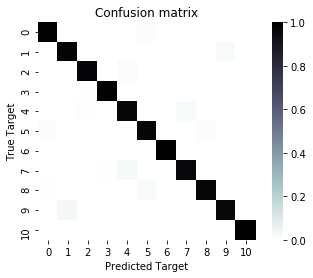

Wall time: 2.5 s


In [86]:
%%time
# Decision tree
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm_normalized, cmap="bone_r")
ax.set_aspect(1)
plt.title("Confusion matrix")
plt.ylabel("True Target")
plt.xlabel("Predicted Target")
plt.show()

In [87]:
u=np.unique(y_test)
u

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [92]:
cm=np.zeros([len(u),len(u)])
cm

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# Confusion Matrix 

In [93]:
for i in range(len(y_test)):
    cm[y_pred[i]-1][y_test[i]-1]=cm[y_pred[i]-1][y_test[i]-1]+1
    
        
cm=np.transpose(cm)
cm

array([[703.,   0.,   0.,   0.,   0.,   9.,   0.,   0.,   0.,   0.,   0.],
       [  0., 800.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  21.,   0.],
       [  0.,   0., 726.,   2.,  13.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   3., 732.,   2.,   0.,   1.,   1.,   0.,   0.,   0.],
       [  0.,   0.,   8.,   1., 722.,   0.,   0.,  16.,   0.,   0.,   0.],
       [ 11.,   3.,   0.,   0.,   0., 742.,   0.,   1.,  12.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 760.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   2.,   3.,  21.,   0.,   0., 689.,   0.,   0.,   0.],
       [  5.,   1.,   0.,   0.,   0.,  15.,   0.,   0., 715.,   1.,   0.],
       [  0.,  25.,   0.,   0.,   0.,   0.,   0.,   0.,   1., 705.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 719.]])

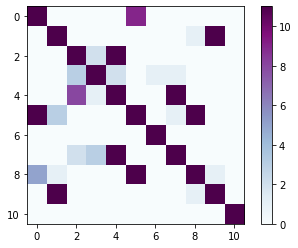

In [94]:
plt.imshow(cm, cmap="BuPu",vmin=0,vmax=len(u))
plt.colorbar()
plt.show()

# Accuracy

In [8]:
accuracy=[]
for i in range(len(cm[0])):
    accuracy.append(cm[i][i])

accuracy=sum(accuracy)/sum(sum(cm))
print("Accuracy ",accuracy)

Accuracy  0.9815673828125


In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9815673828125

# Precision

In [10]:
precision=[]
for i in range(len(cm[0])):
    if sum(cm[i])!=0:
        precision.append(cm[i][i]/sum(cm[i]))
    else:
        precision.append(0)
print(precision)
print("\nPrecision ",mean(precision))

[0.9818652849740933, 0.9654696132596685, 0.9854497354497355, 0.9923076923076923, 0.9636871508379888, 0.9663865546218487, 1.0, 0.9859353023909986, 0.9680851063829787, 0.9857512953367875, 1.0]

Precision  0.9813579759601629


In [11]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

0.9814671961600099

# Recall

In [12]:
recall=[]
for i in range(len(cm[0])):
    if sum(cm[:,i])!=0:
        recall.append(cm[i][i]/sum(cm[:,i]))
    else:
        recall.append(0)
print(recall)
print("\nRecall",mean(recall))

[0.979328165374677, 0.9831223628691983, 0.9802631578947368, 0.993581514762516, 0.967741935483871, 0.9583333333333334, 0.9986754966887417, 0.9859353023909986, 0.978494623655914, 0.9706632653061225, 1.0]

Recall 0.9814671961600099


In [13]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.9813579759601629

# F1 Score

In [14]:
f1=[]
for i in range(len(cm[0])):
    if precision[i]+recall[i]!=0:
        f1.append((2*precision[i]*recall[i])/(precision[i]+recall[i]))
    else:
        f1.append(0)
print(f1)
print("\nF1 ",mean(f1))

[0.9805950840879689, 0.9742160278745645, 0.9828496042216359, 0.9929441949967928, 0.9657102869139258, 0.9623430962343097, 0.9993373094764745, 0.9859353023909987, 0.9732620320855615, 0.9781491002570694, 1.0]

F1  0.9813947307763001


In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.9813947307763001